## Importing Libraries

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

## Reading the data

In [19]:
# reading the dataset
df = pd.read_csv("C:/Users/shall/Downloads/archive (8)/Synthetic_Financial_datasets_log.csv")

## Printing the data

In [21]:
# printing the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Statistical Analysis

In [22]:
# print the shape of the data
df.shape

(6362620, 11)

In [23]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [24]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [25]:
# checking the missing values in the data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [26]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Exploratory Data Analysis

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


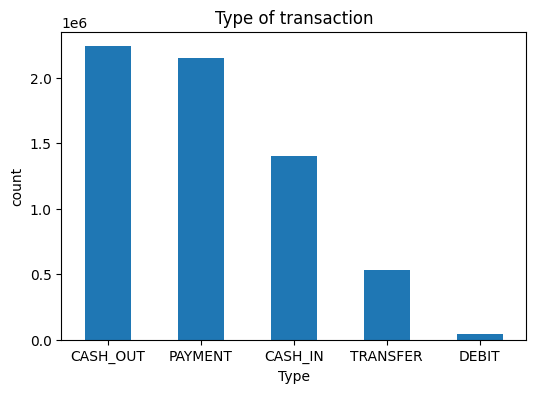

In [28]:
plt.figure(figsize = (6,4))
df['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

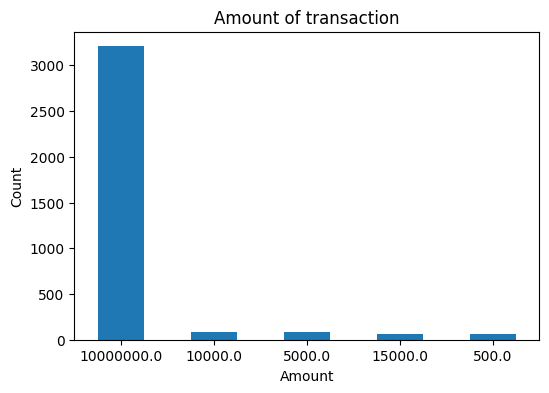

In [29]:
plt.figure(figsize = (6,4))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title('Amount of transaction')
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [30]:
df.groupby('type').count()['amount']

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

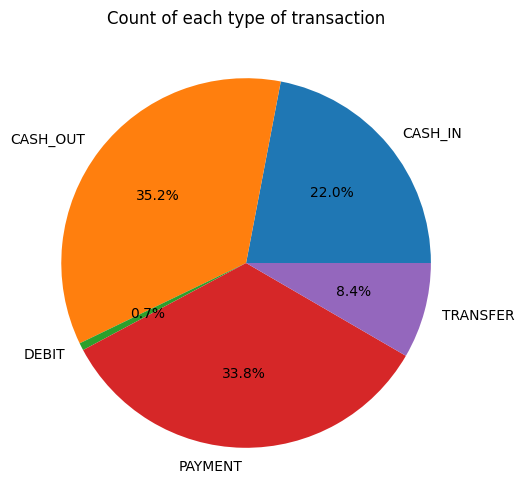

In [32]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (8,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%")
plt.title('Count of each type of transaction')
plt.show()

In [33]:
df.groupby(['type', 'isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

## Finding the correlation between the attributes (Pearson correlation matrix)

In [34]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson correlation matrix of the numerical data
correlation = numeric_data.corr()

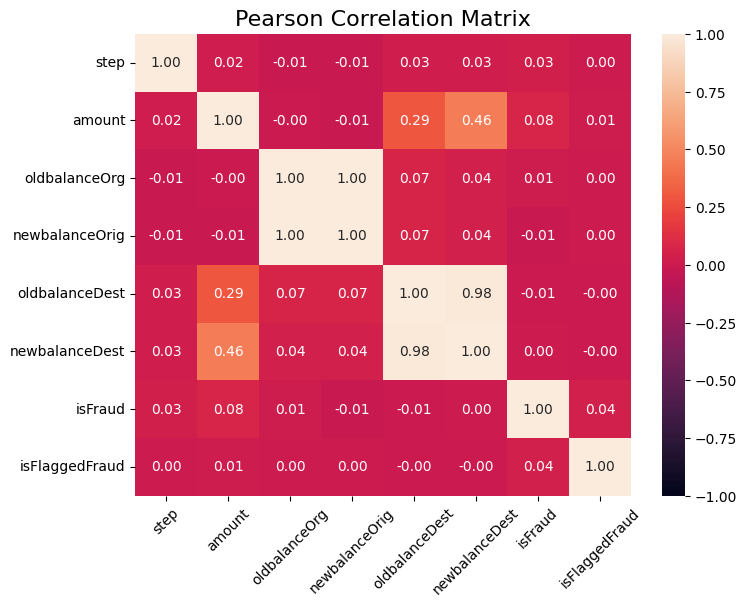

In [35]:
# visualising the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

## Implementation of machine learning algorithm:

In [36]:
# removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis = 1, inplace = True)

In [41]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [42]:
# printing the dataframe after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [43]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [44]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [45]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [48]:
# make an object of Logistic Regression
lr =  LogisticRegression()

# fitting the training data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
# testing the model on test data
y_pred = lr.predict(X_test)

In [51]:
# calculating the performance matrix

# accuracy of the Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the Logistic Regression
precision_lr = precision_score(y_test, y_pred)

# recall of the Logistic Regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9987065076965149
Precision of logistic regression 0.09375
Recall of logistic regression 0.001851851851851852
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.09      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.55      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



#### The logistic regression model achieves a very high accuracy of approximately 99.87%. However, its precision and recall for the positive class are notably low, around 9.91% and 0.19%, respectively. This indicates that while the model performs well in predicting negative instances, it struggles to identify positive instances accurately. This suggests the model's limited effectiveness in scenarios where correctly identifying positive cases is critical.

## Decision Tree

In [53]:
# make an object 
sv = DecisionTreeClassifier(max_depth = 20)

# fitting the training data into model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

In [54]:
# calculating the performance matrix

# accuracy 
accuracy_sv = accuracy_score(y_test, y_pred)

# precision 
precision_sv = precision_score(y_test, y_pred)

# recall 
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.9989894100229151
Precision of Decision Tree 0.6735966735966736
Recall of Decision Tree 0.4
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.67      0.40      0.50      1620

    accuracy                           1.00   1272524
   macro avg       0.84      0.70      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



#### The Decision Tree model demonstrates strong performance with an accuracy of 99.90%. It achieves a precision of 67.35% and recall of 40.08% for the positive class, similar to the logistic regression model. This suggests the Decision Tree model effectively identifies true positives among its positive predictions while capturing 40% of actual positive instances. The model maintains a high F1-score of 0.50 for the positive class, indicating balanced precision and recall.

## Comparing the model

In [55]:
performance_df = pd.DataFrame({
    'models' : ['Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_lr, accuracy_sv],
    'precision' : [precision_lr, precision_sv],
    'recall' : [recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Logistic Regression,0.998707,0.093750,0.001852
1,Decision Tree,0.998989,0.673597,0.400000


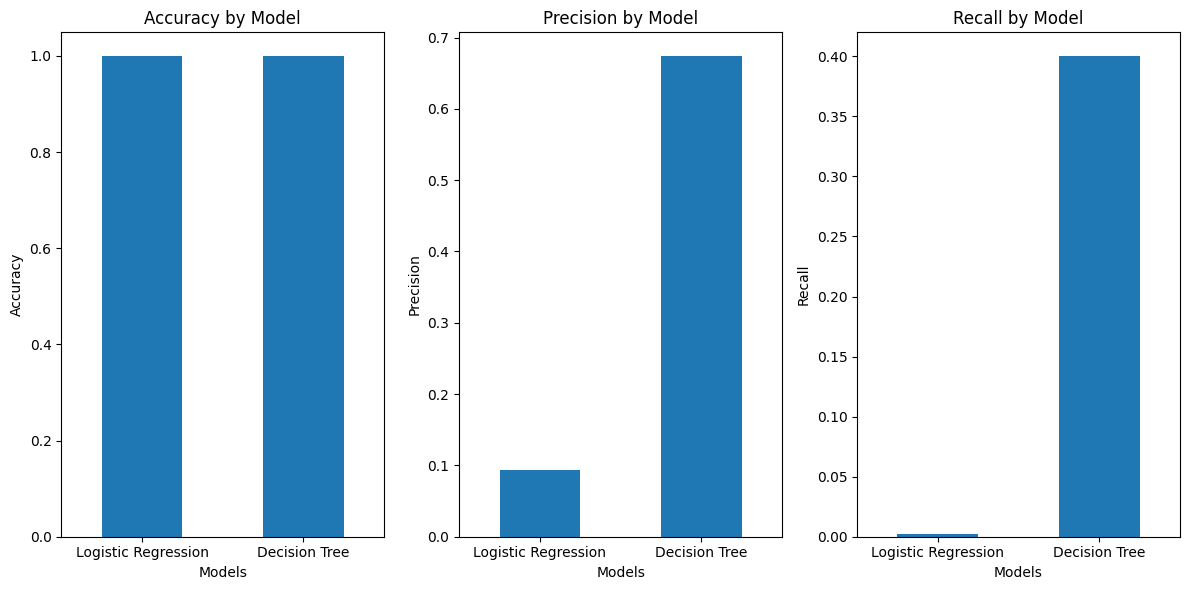

In [57]:
# create a figure and multiple axis objects
fig, ax = plt.subplots(1,3, figsize = (12,6))  #1 row, 3 columns

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind= 'bar', ax=ax[i])
    
    # set the tick lables and rotations
    ax[i].set_xticklabels(performance_df['models'], rotation = 0)
    
    # adding labels
    ax[i].set_xlabel('Models')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_title(f'{metric.capitalize()} by Model')

plt.tight_layout()
plt.show()

#### The Decision Tree model shows the most balanced performance with respect to precision and recall. Logistic Regression performs poorly in correctly identifying positive instances despite its high accuracy.